Upload do arquivo dados

In [ ]:
from google.colab import files
upload = files.upload()


#Rede Neural Artificial




Importando as bibliotecas

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from statistics import mean

Importando o arquivo com as variáveis e definindo as nove variáveis como previsores(x) e V15 como classe(y)

In [7]:
df = pd.read_excel('dados.xlsx', sheet_name='Variaveis finais')
previsores = df.drop(columns=['V15'])
classe = df.drop(columns=['V1', 'V2', 'V3', 'V4', 'V7', 'V8', 'V10', 'V13', 'V14'])

Transformação da classe para o formato "dummy", pois temos uma rede neural com 2 neurônios na camada de saída

In [8]:
classe_dummy = np_utils.to_categorical(classe)

Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_dummy,
                                                                  test_size = 0.7,
                                                                  random_state = 0)

Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)

In [10]:
modelo = Sequential()
#primeira camada oculta, 9 variáveis de entrada
modelo.add(Dense(units = 500, input_dim = 9))
#segunda camada oculta
modelo.add(Dense(units = 400))
modelo.add(Dense(units = 2, activation = 'softmax'))

Visualização da estrutura da rede neural

In [11]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               5000      
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 2)                 802       
                                                                 
Total params: 206,202
Trainable params: 206,202
Non-trainable params: 0
_________________________________________________________________


Configuração dos parâmetros da rede neural (SGD = algoritmo para atualizar os pesos e loss = cálculo do erro)

In [12]:
modelo.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.3, momentum=0.3), loss = 'categorical_crossentropy',
               metrics = ['accuracy'])


Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)

In [13]:
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 1000,
           validation_data = (X_teste, y_teste))

Epoch 1/1000
2/2 [==============================] - 1s 217ms/step - loss: 0.6587 - accuracy: 0.6458 - val_loss: 0.7549 - val_accuracy: 0.6491
Epoch 2/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.7155 - accuracy: 0.6458 - val_loss: 0.6754 - val_accuracy: 0.5351
Epoch 3/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.6937 - accuracy: 0.6250 - val_loss: 0.6775 - val_accuracy: 0.5175
Epoch 4/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.6483 - accuracy: 0.6042 - val_loss: 0.6227 - val_accuracy: 0.6491
Epoch 5/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.6131 - accuracy: 0.6667 - val_loss: 0.6306 - val_accuracy: 0.6491
Epoch 6/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.6140 - accuracy: 0.6458 - val_loss: 0.6769 - val_accuracy: 0.4737
Epoch 7/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.6322 - accuracy: 0.5625 - val_loss: 0.7102 - val_accuracy: 0.6491
Epoch 8/1000

Plota o gráfico de acertos em teste e treinamento

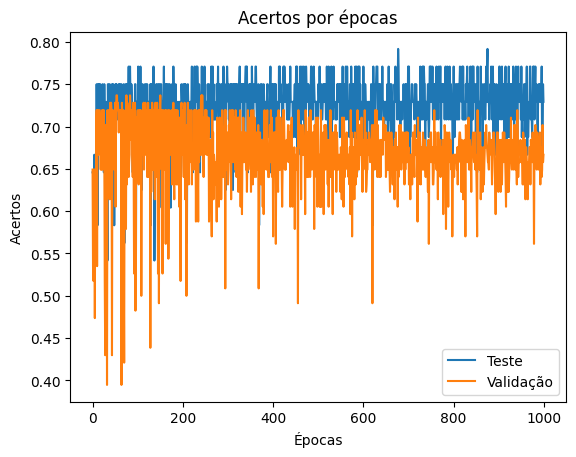

In [14]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acertos por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acertos')
plt.legend(['Teste', 'Validação'])

Calcula as médias de erros e acertos em teste e validação

In [15]:
mediaAcertosT = mean(historico.history['accuracy'])
mediaAcertosV = mean(historico.history['val_accuracy'])
mediaErrosT = mean(historico.history['loss'])
mediaErrosV = mean(historico.history['val_loss'])
print("Média de acertos em teste:" + str(mediaAcertosT))
print("Média de acertos em val:" + str(mediaAcertosV))
print("Média de erros em teste:" + str(mediaErrosT))
print("Média de erros em val:" + str(mediaErrosV))

Média de acertos em teste:0.7221666672229767
Média de acertos em val:0.6666929825544358
Média de erros em teste:0.47631671497225764
Média de erros em val:0.5627868109941483


Previsões e mudar a variável para True ou False de acordo com o threshold 0.5

In [ ]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

Como é um problema com duas saídas, precisamos buscar a posição que possui o maior valor (são retornados 2 valores)

In [ ]:
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

Geração da matriz de confusão

In [ ]:
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao